In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [184]:
name_flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [185]:
SIZE = 150
X = []
Y = []
flower_folder = 'flowers'
num = 0
for name in name_flowers:
    folder = flower_folder + '/' + name
    print(folder)
    for pic in os.listdir(folder):
        img = cv2.imread(folder + '/' + pic)
        img = cv2.resize(img, (SIZE, SIZE))
        X.append(img)
        Y.append(num)
    num += 1

flowers/daisy
flowers/dandelion
flowers/rose
flowers/sunflower
flowers/tulip


In [186]:
def random_image(name_flowers, images, labels):
    index = np.random.randint(len(images))
    plt.figure()
    plt.imshow(images[index])
    plt.grid(True)
    plt.title(f'Image #{index}, category: {Y[index]} - {name_flowers[Y[index]]}')
    plt.show()

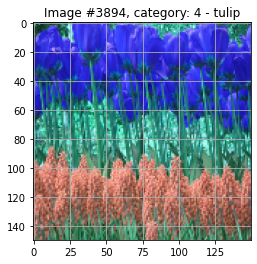

In [187]:
random_image(name_flowers, X, Y)

In [188]:
Y = to_categorical(Y,num_classes = 5)
print(Y)
X = np.array(X)
X = X/255

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [190]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [191]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 18, 96)       

In [192]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [193]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [194]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 18, 96)       

In [196]:
History = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test, Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 76s 3s/step - loss: 1.4252 - accuracy: 0.3754 - val_loss: 1.2316 - val_accuracy: 0.4528
Epoch 2/50
25/25 [==============================] - 68s 3s/step - loss: 1.1889 - accuracy: 0.4786 - val_loss: 1.0925 - val_accuracy: 0.5204
Epoch 3/50
25/25 [==============================] - 66s 3s/step - loss: 1.0828 - accuracy: 0.5658 - val_loss: 1.0082 - val_accuracy: 0.6065
Epoch 4/50
25/25 [==============================] - 67s 3s/step - loss: 1.0428 - accuracy: 0.5780 - val_loss: 0.9571 - val_accuracy: 0.6333
Epoch 5/50
25/25 [==============================] - 66s 3s/step - loss: 0.9915 - accuracy: 0.5973 - val_loss: 1.0316 - val_accuracy: 0.6222
Epoch 6/50
25/25 [==============================] - 68s 3s/step - loss: 0.9136 - accuracy: 0.6369 - val_loss: 0.9061 - val_accuracy: 0.6491
Epoch 7/50
25/25 [==============================] - 67s 3s/step - loss: 0.8961 - accuracy: 0.6568 - val_loss: 0.9155 - val_accuracy: 0.6556
Epoch 8/50
25/25 [==

In [199]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7685185074806213


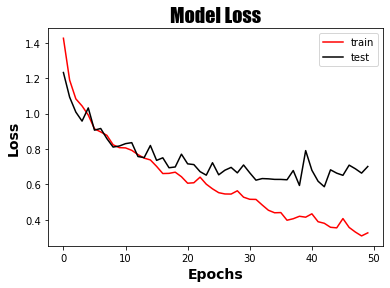

In [211]:
plt.plot(History.history['loss'], color='red')
plt.plot(History.history['val_loss'], color='black')
plt.title('Model Loss', fontsize=20, family='fantasy')
plt.ylabel('Loss', fontweight='bold', fontsize=14)
plt.xlabel('Epochs', fontweight='bold', fontsize=14)
plt.legend(['train', 'test'])
plt.show()

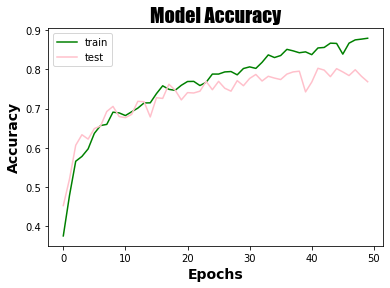

In [209]:
plt.plot(History.history['accuracy'], color='green')
plt.plot(History.history['val_accuracy'], color='pink')
plt.title('Model Accuracy', fontsize=20, family='fantasy')
plt.ylabel('Accuracy', fontweight='bold', fontsize=14)
plt.xlabel('Epochs', fontweight='bold', fontsize=14)
plt.legend(['train', 'test'])
plt.show()

In [217]:
y_pred = model.predict(X_test)

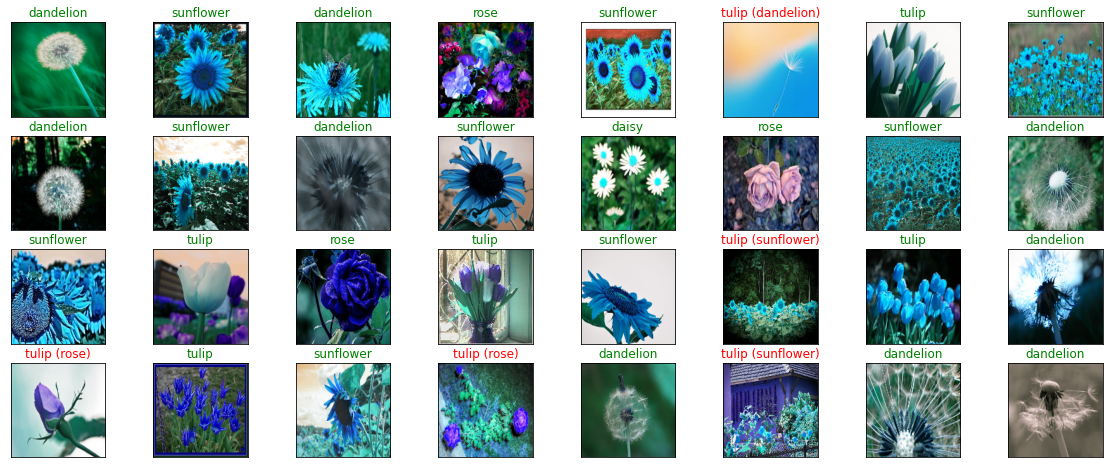

In [222]:
fig=plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)) :
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[idx])
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    if pred_idx == true_idx :
        ax.set_title("{}".format(name_flowers[pred_idx]),color=("green"))
    else :
        ax.set_title("{} ({})".format(name_flowers[pred_idx], name_flowers[true_idx]),color=("red"))